In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("rock_density_xray.csv")

In [70]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [71]:
df.columns=['Signal',"Density"]

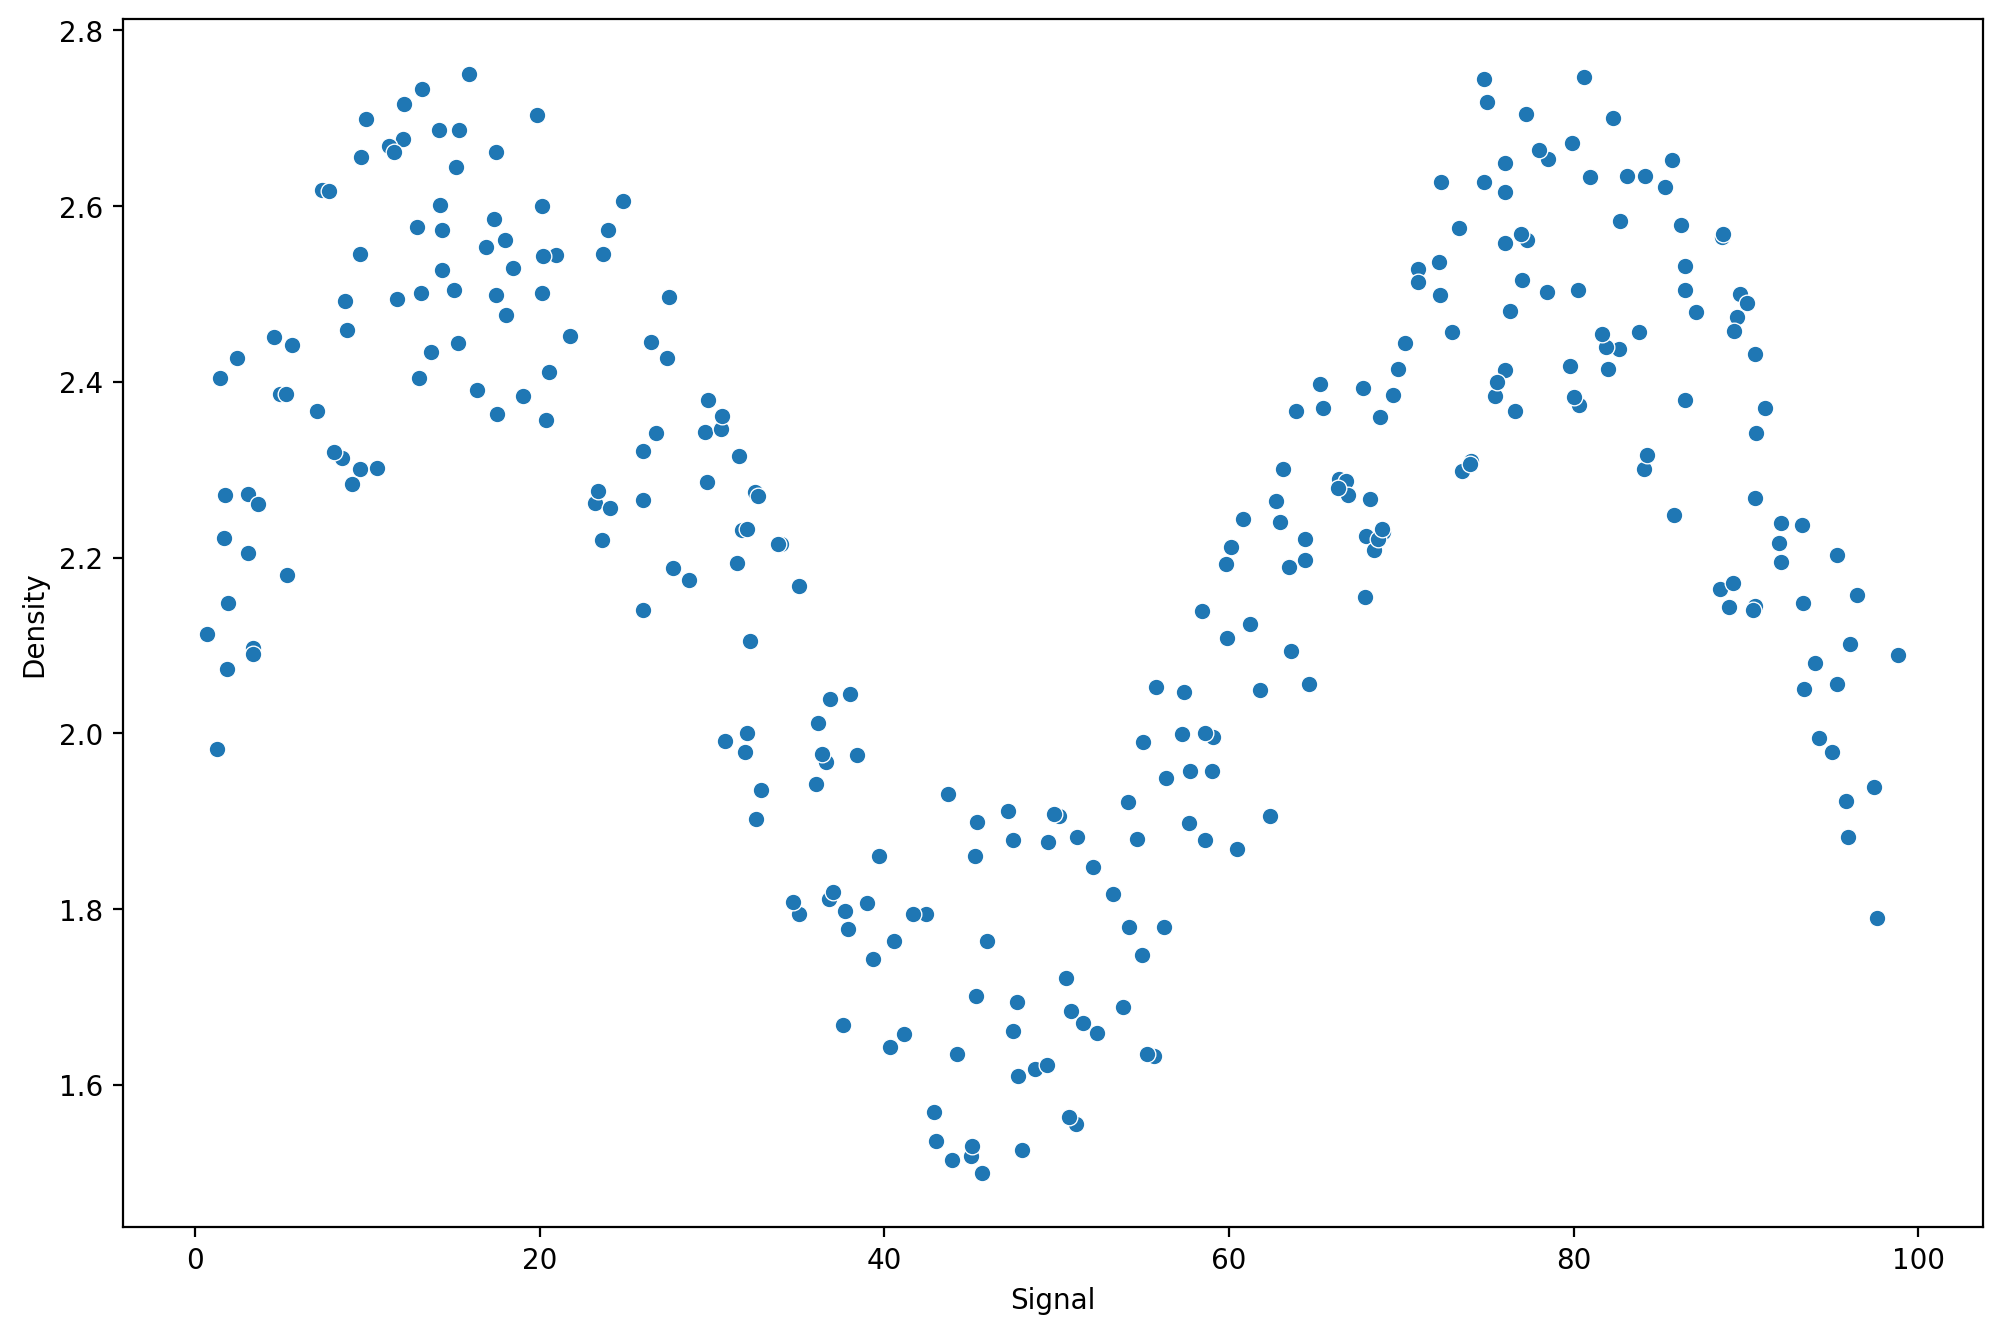

In [72]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df);

---
---

## Splitting the Data


In [73]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr_model = LinearRegression()

In [78]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [79]:
lr_preds = lr_model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [82]:
signal_range = np.arange(0,100)

In [83]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

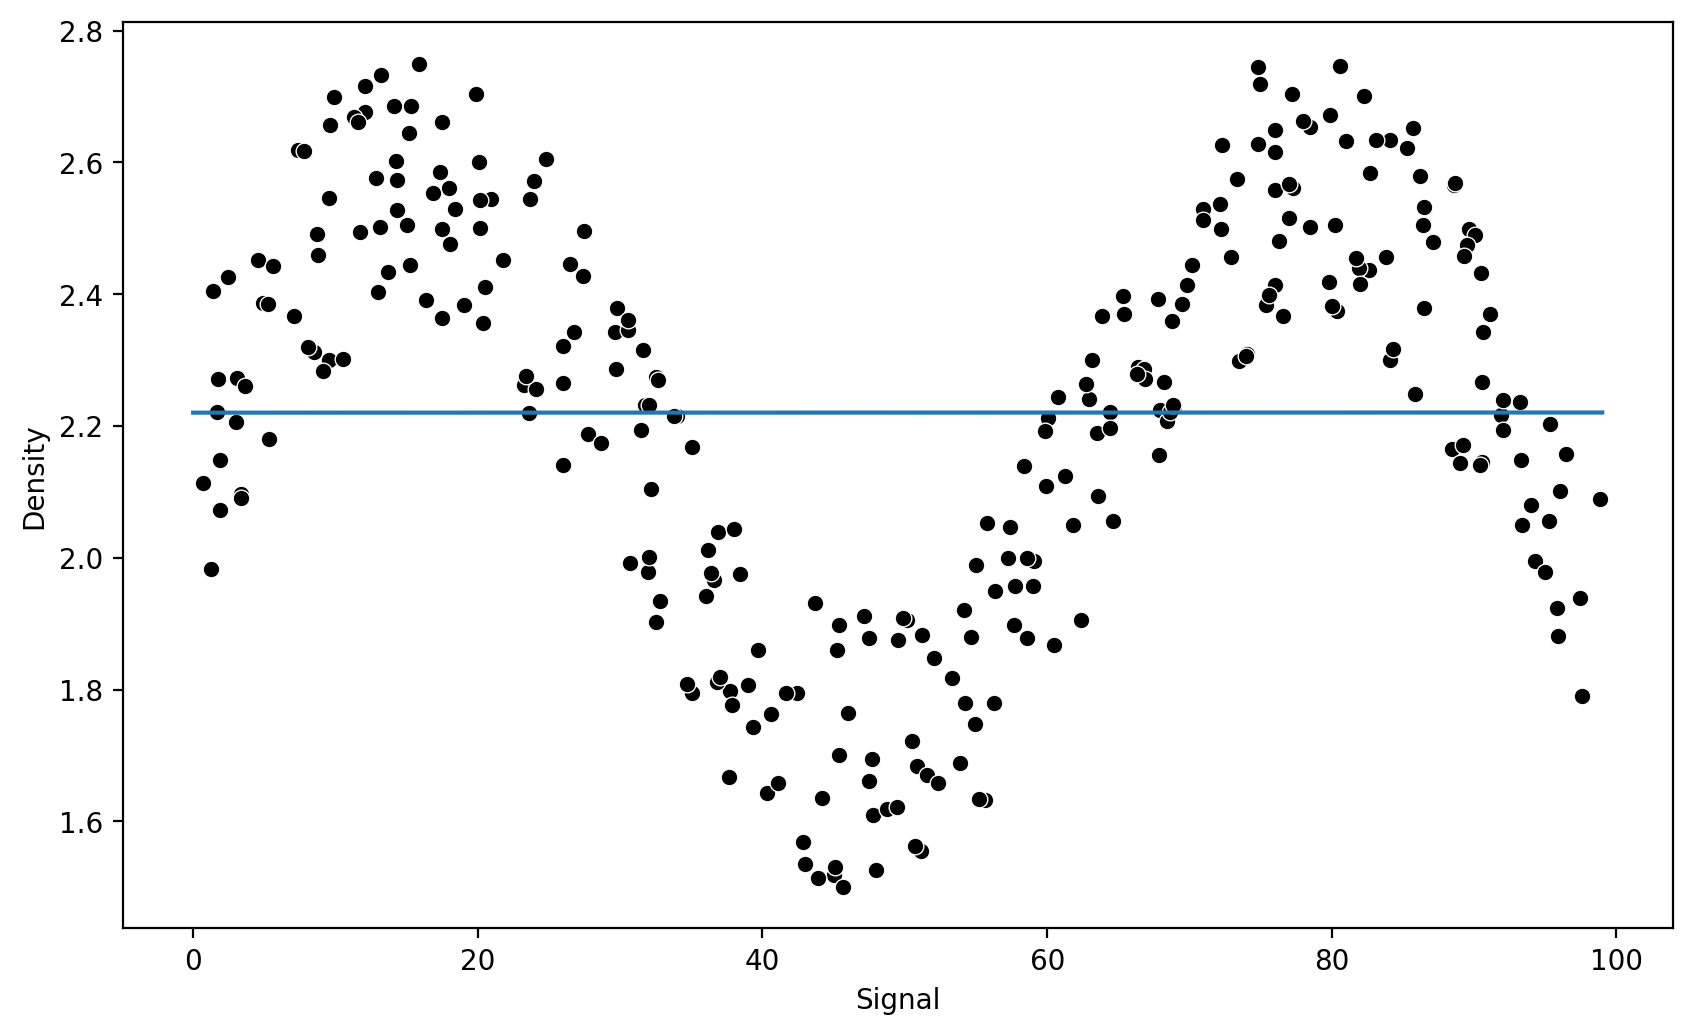

In [84]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output);

---

# Polynomial Regression

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [86]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics 
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(10,4),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

## Pipeline for Poly Orders

In [87]:
from sklearn.pipeline import make_pipeline

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725559


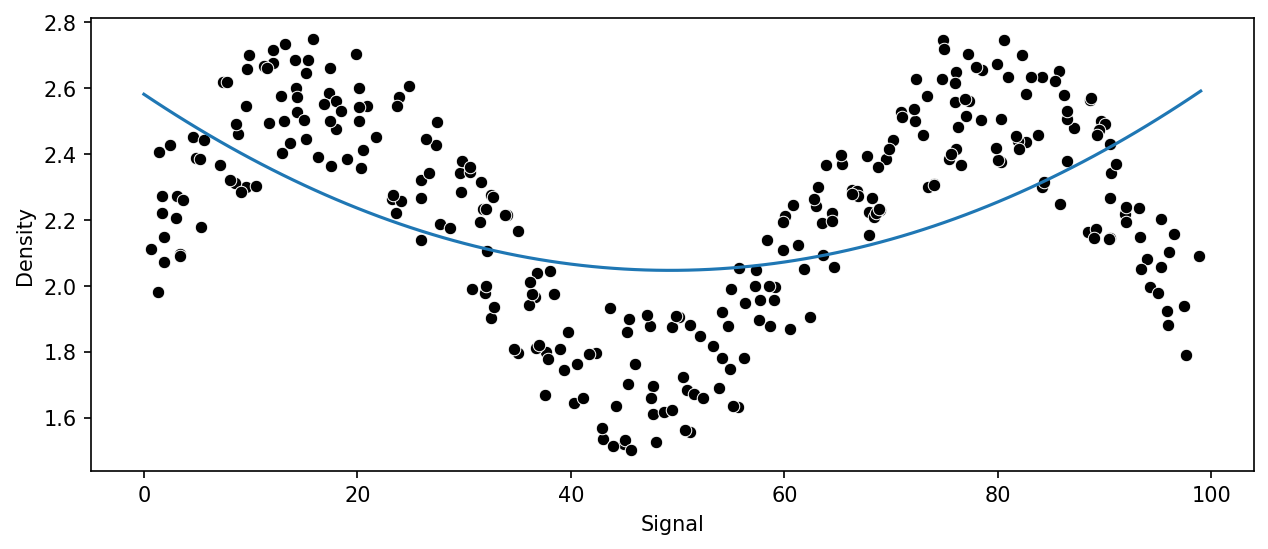

In [90]:
run_model(pipe,X_train,y_train,X_test,y_test);

## Comparing Various Polynomial Orders

RMSE : 0.13807557849778548


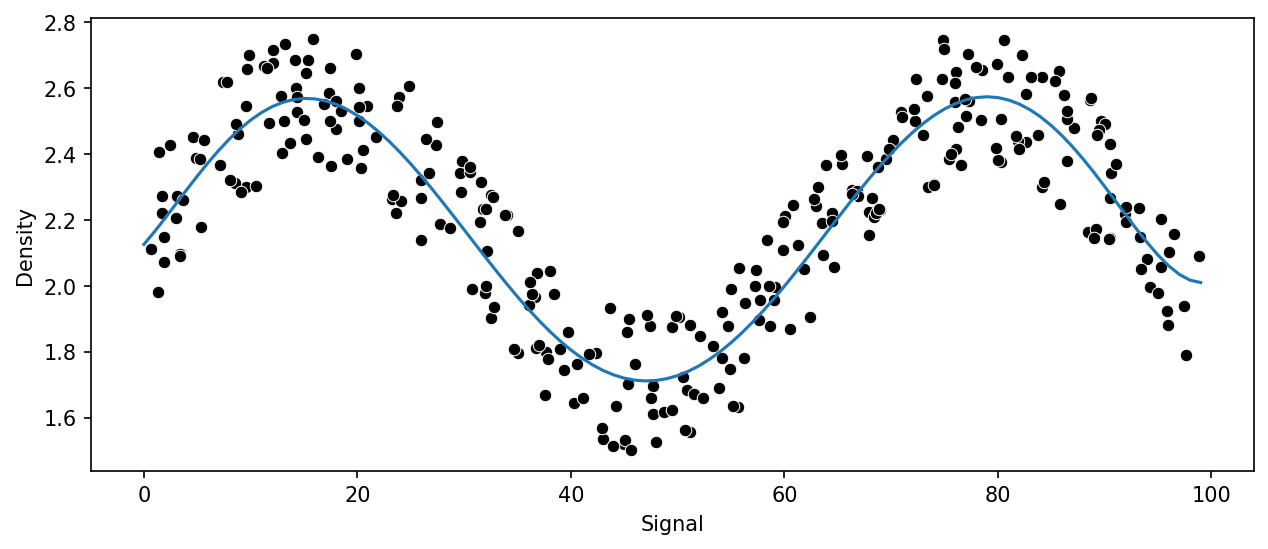

In [91]:
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test);

RMSE : 0.14588633413327826


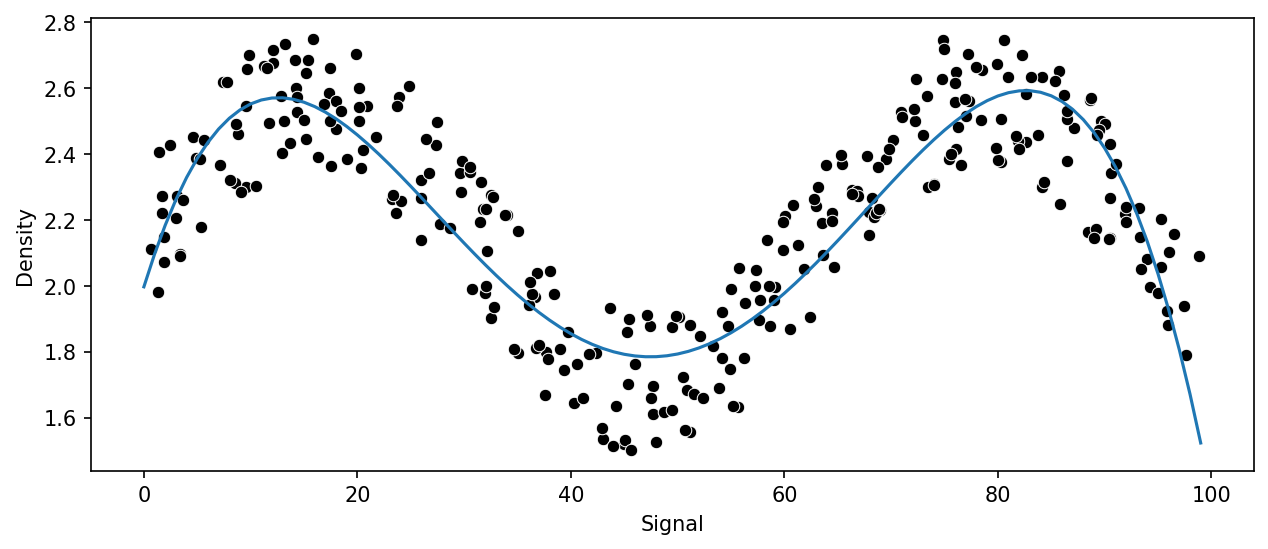

In [92]:
pipe = make_pipeline(PolynomialFeatures(4),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test);

----

## KNN Regression

In [93]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


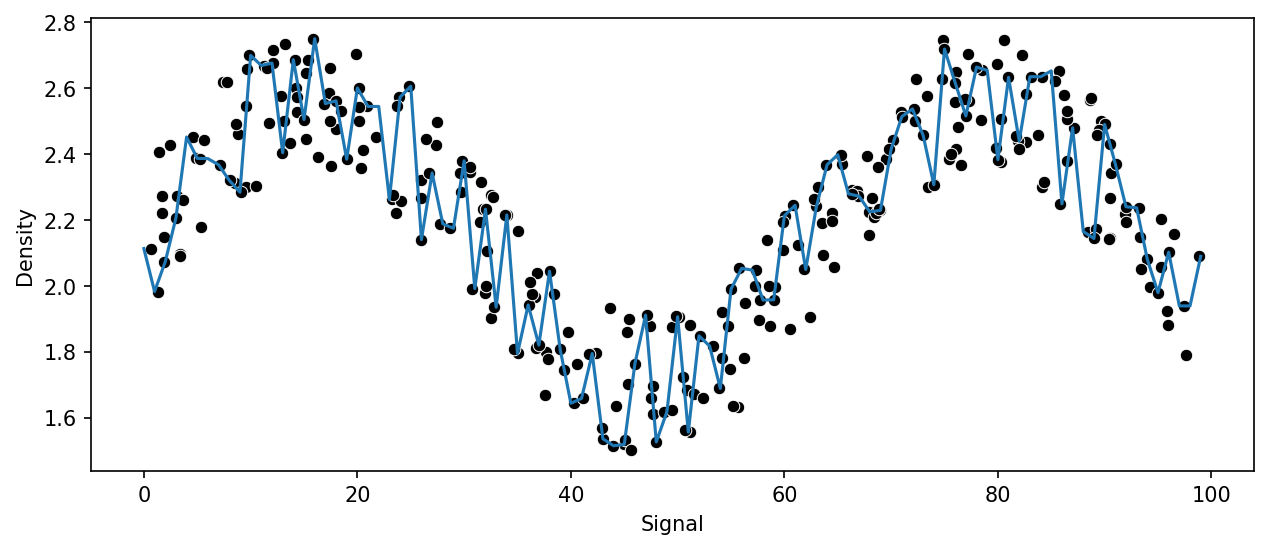

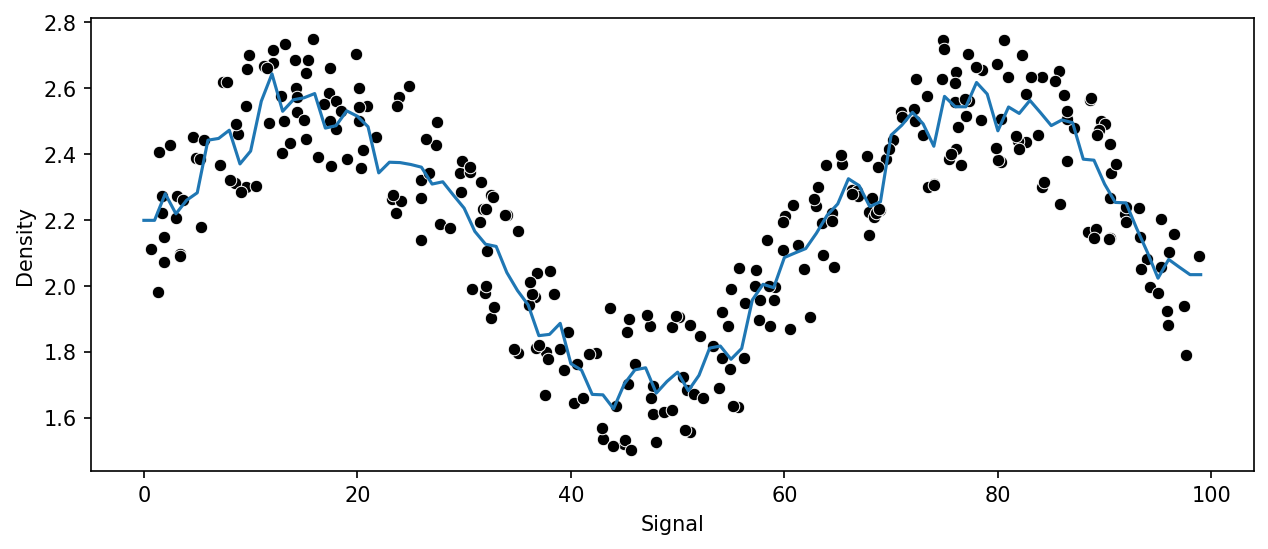

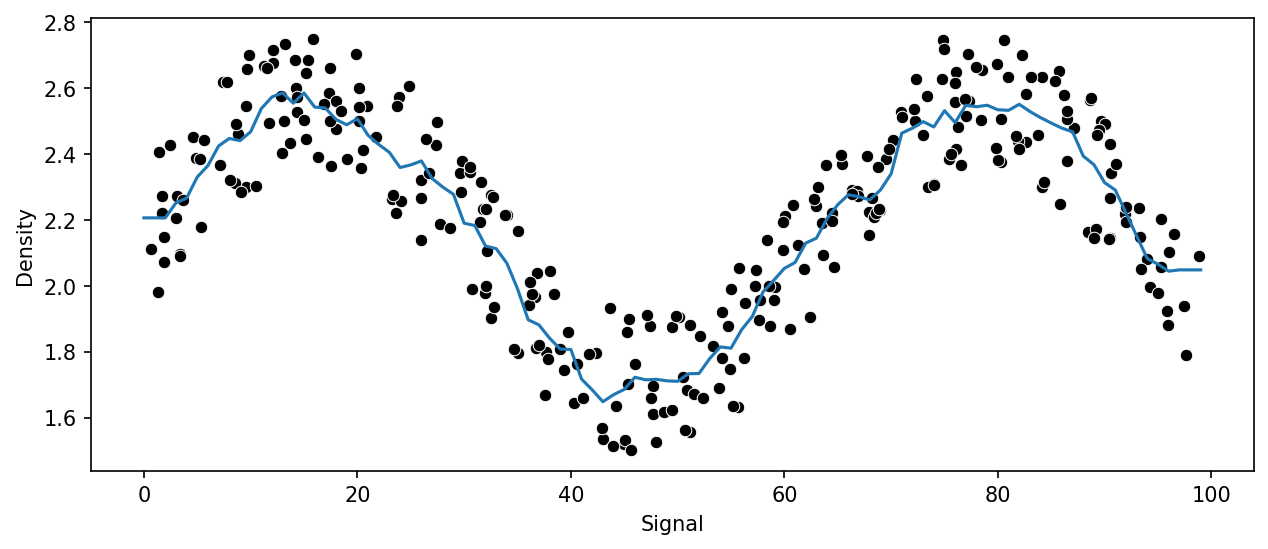

In [94]:
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test);

---
## Decision Tree Regression

In [95]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


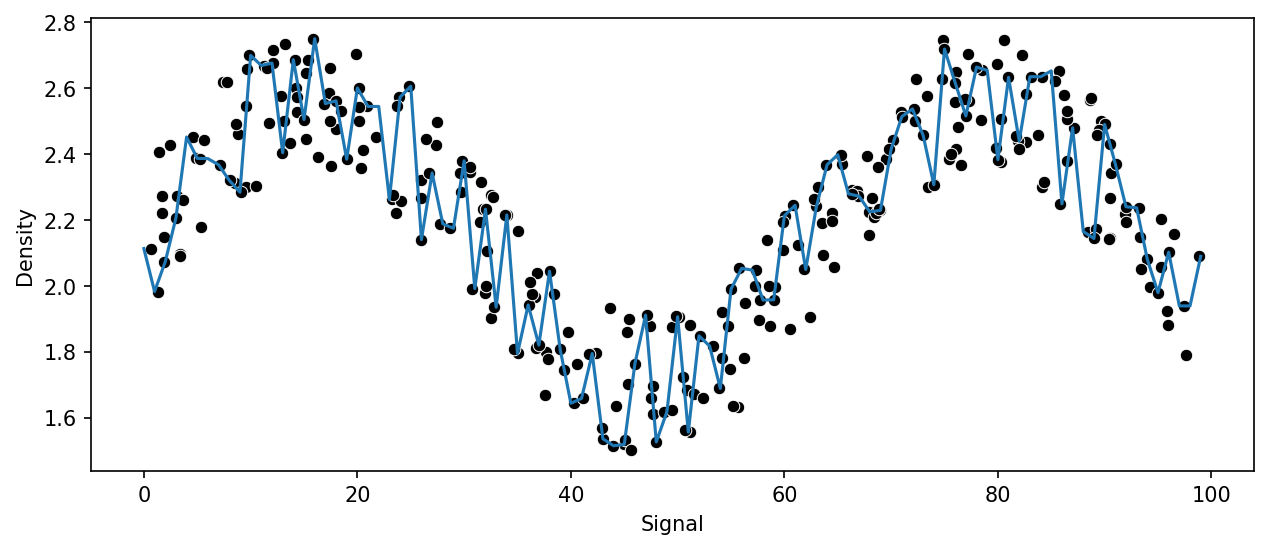

In [96]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test);

In [97]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [98]:
from sklearn.svm import SVR

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [101]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


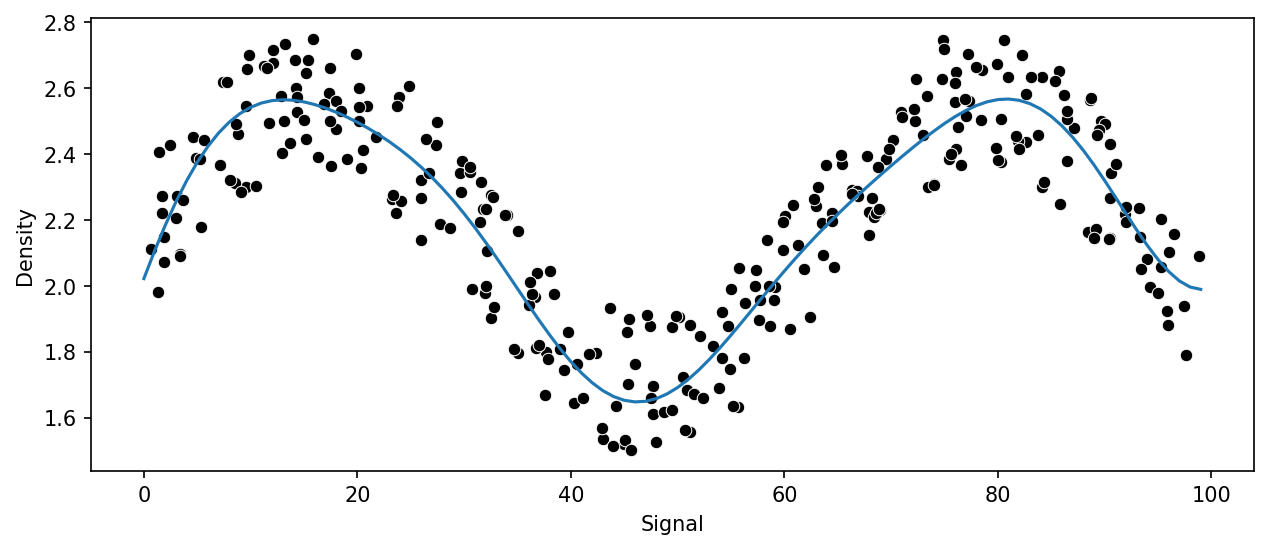

In [102]:
run_model(grid,X_train,y_train,X_test,y_test)

In [103]:
grid.best_estimator_

SVR(C=1000)

---

## Random Forest Regression

In [104]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.14351087473256885
RMSE : 0.136635286666048
RMSE : 0.13387478307561104


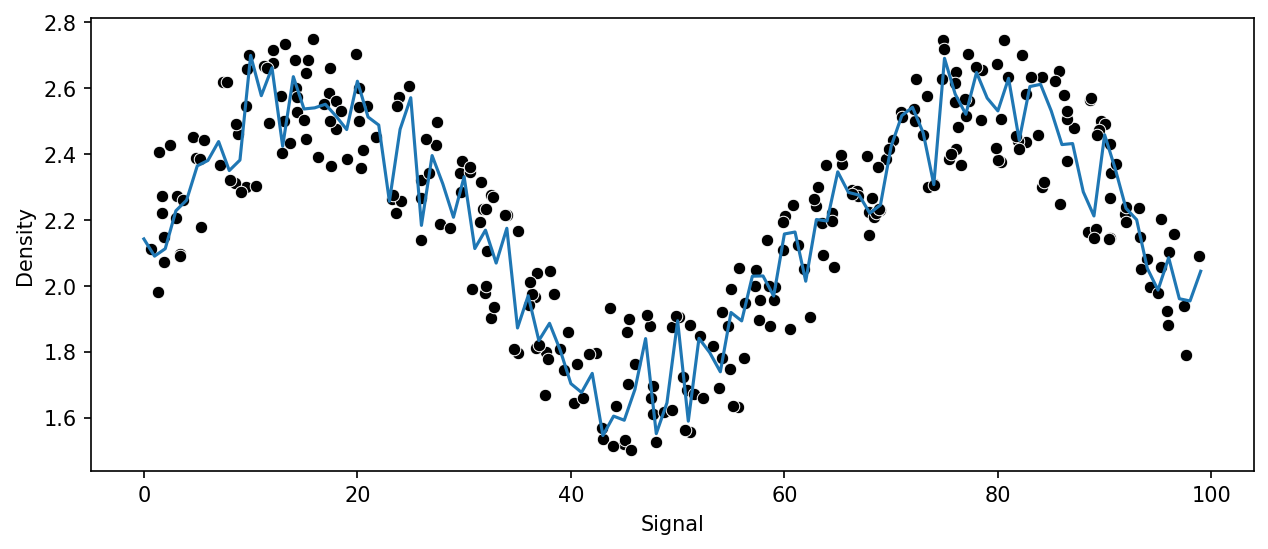

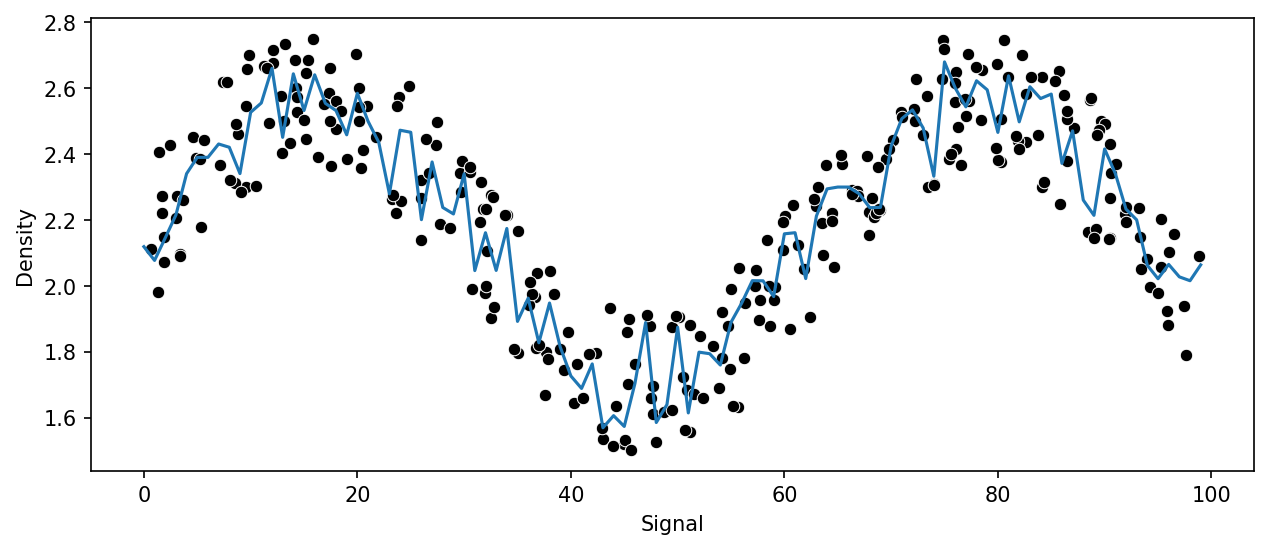

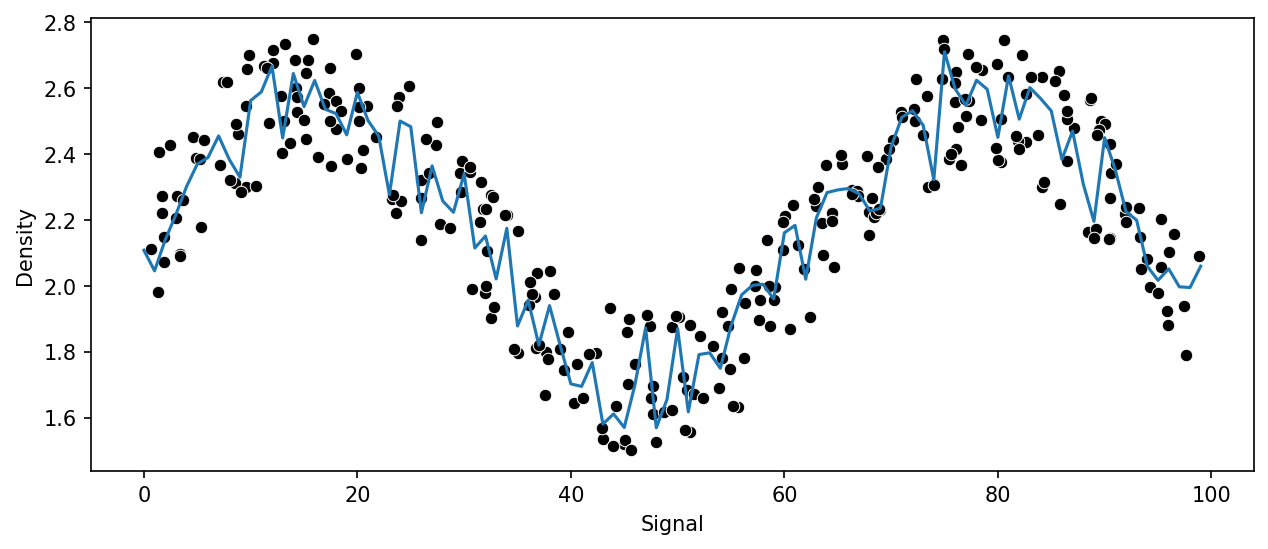

In [105]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)